In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

In [29]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters.style.set_properties(**{'text-align': 'left'})
#inputParameters

,key,value
0,inputDataFolder,/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/
1,outputDataFolder,/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/output
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,framerate_msec,5689
5,sigma_detectionLoG,2
6,ch0_outputDataFolder,output_488
7,ch0_uniqueFilenameString,_488_
8,ch0_detectionFilename,Detection3D.mat
9,ch0_trackingFilename,trackedFeatures.mat


In [30]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [31]:
inputDataFolder = getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = getInputParameter(inputParameters,"outputDataFolder")
ch0_outputDataFolder  = getInputParameter(inputParameters,"ch0_outputDataFolder")
ch0_trackingCsvFilename = getInputParameter(inputParameters,"ch0_trackingCsvFilename")
ch1_outputDataFolder  = getInputParameter(inputParameters,"ch1_outputDataFolder")
ch1_trackingCsvFilename = getInputParameter(inputParameters,"ch1_trackingCsvFilename")

ch0_uniqueFilenameString = getInputParameter(inputParameters,"ch0_uniqueFilenameString")
ch1_uniqueFilenameString = getInputParameter(inputParameters,"ch1_uniqueFilenameString")
#trackColor = getInputParameter(inputParameters,"trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(getInputParameter(inputParameters,"movieLength"))
#print(trackColor)




In [32]:
print(movieLength)

70


In [35]:
from os import listdir
from os.path import isfile, join
import fnmatch

folder = inputDataFolder
print('--- folder searched in: '+folder)

c = []
for file in listdir(inputDataFolder):
    if isfile(join(inputDataFolder, file)) and fnmatch.fnmatch(file, '*'+ch0_uniqueFilenameString+'*.tif'):
        ch0_filesOfInterest.append(file)
ch0_filesOfInterest=np.sort(ch0_filesOfInterest)

ch1_filesOfInterest = []
for file in listdir(inputDataFolder):
    if isfile(join(inputDataFolder, file)) and fnmatch.fnmatch(file, '*'+ch1_uniqueFilenameString+'*.tif'):
        ch1_filesOfInterest.append(file)
ch1_filesOfInterest=np.sort(ch1_filesOfInterest)

print('--- example of files found: '+ch0_filesOfInterest[0])
print('--- number of files found: '+str(len(ch0_filesOfInterest)))

--- folder searched in: /Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/
--- example of files found: cropped_488_pm50px_maxAmpl_0000.tif
--- number of files found: 70


/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100//S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0010_560nm_0056891msec_0090172992msecAbs_000x_000y_003z_0000t_decon.tif
(100, 100, 100)


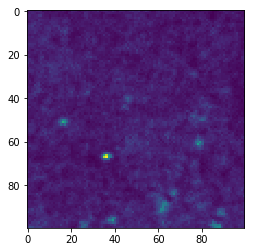

In [36]:
path = inputDataFolder+'/'+filesOfInterest[10]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(inputDataFolder+'/'+ch0_filesOfInterest[10])
print(latticeMovieFrame.shape)
plt.imshow(latticeMovieFrame[50])

In [8]:
def cropLatticeFrame(frame,center,margin):
    zMax,yMax,xMax = frame.shape
    startx = max(center[0]-margin[0],0)
    endx = min(center[0]+margin[0],xMax)
    
    starty = max(center[1]-margin[1],0)
    endy = min(center[1]+margin[1],yMax)
    
    startz = max(center[2]-margin[2],0)
    endz = min(center[2]+margin[2],xMax)
    
    return frame[startz:endz,starty:endy,startx:endx]

In [ ]:
# display a whole image series

In [20]:
#    center=np.array([ 214.98012571 , 281.93155857 ,  90.67524957])
#    center = np.array([459,513,92])
#    center = np.array([214, 281,  90]) this is from where I made all the movies from, margin=[20,20,20]
center = np.array([300,300,100])

for i in range(0,movieLength):
    print(i)
    
    path = inputDataFolder+'/'+ch0_filesOfInterest[i]
    print('ch0',path)
    
    latticeMovieFrame = skimage.external.tifffile.imread(path)
    cropped = cropLatticeFrame(latticeMovieFrame,center.astype(int),[50,50,50])
    skimage.external.tifffile.imsave('./tmp/crop_100x100x100/cropped_488_pm50px_maxAmpl_'+str(i).zfill(4)+'.tif', cropped)
    
    path = inputDataFolder+'/'+ch1_filesOfInterest[i]
    print('ch1',path)
    
    latticeMovieFrame = skimage.external.tifffile.imread(path)
    cropped = cropLatticeFrame(latticeMovieFrame,center.astype(int),[50,50,50])
    skimage.external.tifffile.imsave('./tmp/crop_100x100x100/cropped_560_pm50px_maxAmpl_'+str(i).zfill(4) +'.tif', cropped)
    

0
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0000_488nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
1
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0001_488nm_0005689msec_0090121790msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_

ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0014_560nm_0079647msec_0090195748msecAbs_000x_000y_003z_0000t_decon.tif
15
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0015_488nm_0085336msec_0090201437msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0015_560nm_0085336msec_0090201437msecAbs_000x_000y_003z_0000t_decon.tif
16
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position

29
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0029_488nm_0164983msec_0090281084msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0029_560nm_0164983msec_0090281084msecAbs_000x_000y_003z_0000t_decon.tif
30
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0030_488nm_0170672msec_0090286773msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position

ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0043_560nm_0244631msec_0090360732msecAbs_000x_000y_003z_0000t_decon.tif
44
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0044_488nm_0250320msec_0090366421msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0044_560nm_0250320msec_0090366421msecAbs_000x_000y_003z_0000t_decon.tif
45
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position

58
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0058_488nm_0329967msec_0090446068msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0058_560nm_0329967msec_0090446068msecAbs_000x_000y_003z_0000t_decon.tif
59
ch0 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0059_488nm_0335656msec_0090451757msecAbs_000x_000y_003z_0000t_decon.tif
ch1 /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position